In [291]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import re
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn .linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [292]:
df=pd.read_csv('TrainData.csv')
df_test=pd.read_csv('TestData.csv')
df_test1=pd.read_csv('TestData.csv')
pd.set_option('display.max_columns', None)

# calculating nan values present in the dataset

In [293]:
total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/len(df))*100).sort_values(ascending=True)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
nan=missing_data[missing_data["Total"]>0].index
missing_data=missing_data[missing_data["Total"]>0]
nan=pd.DataFrame(nan, columns=['nan col'])
nan
j=[]
for i in nan['nan col']:
    j.append(df[i].dtype)
j=pd.DataFrame(j,columns=['type'])
nan=pd.concat([nan,j],axis=1).set_index('nan col')
nan=pd.concat([missing_data,nan],axis=1)
nan

,Total,Percent,type
nan col,,,


# check for balanced or unbalanced data set

In [294]:
df.Dependent.value_counts()

0    118
1    116
Name: Dependent, dtype: int64

In [295]:
df_test.shape

(80, 51)

In [296]:
df.shape

(234, 51)

# Concatinating test and train file so that we do similar operations on them. After the operations the dataframe will be split into train and test dataframe

In [297]:
dfs=pd.concat([df,df_test],axis=0)

In [298]:
dfs

,CAX_ID,Dependent,Company_Location,Company_raising_fund,Company_Industry_count,Company_mobile_app,Company_investor_count_seed,Company_investor_count_Angel_VC,Company_cofounders_count,Company_advisors_count,Company_senior_team_count,Company_top_Angel_VC_funding,Company_repeat_investors_count,Founders_top_company_experience,Founders_previous_company_employee_count,Founders_startup_experience,Founders_big_5_experience,Company_business_model,Founders_experience,Founders_global_exposure,Founders_Industry_exposure,Founder_education,Founder_university_quality,Founders_Popularity,Founders_fortune1000_company_score,Founders_profile_similarity,Founders_publications,Founders_skills_score,Founders_Entrepreneurship_skills_score,Founders_Operations_skills_score,Founders_Engineering_skills_score,Founders_Marketing_skills_score,Founders_Leadership_skills_score,Founders_Data_Science_skills_score,Founders_Business_Strategy_skills_score,Founders_Product_Management_skills_score,Founders_Sales_skills_score,Founders_Domain_skills_score,Company_incubation_investor,Company_competitor_count,Company_1st_investment_time,Company_avg_investment_time,Company_crowdsourcing,Company_crowdfunding,Company_big_data,Company_analytics_score,Company_Product_or_service,Company_subscription_offering,Founder_highest_degree_type,Company_difficulty_obtaining_workforce,Company_Founder_Patent
0,Company2,1.0,USA,No,Few,Yes,5,0,2,0,4,No,0,Yes,Large,Yes,No,B2C,High,Yes,High,Masters,4,1,0.0,Medium,None,34.0,15.882353,11.764706,15.000000,12.941176,0.000000,8.823529,21.764706,10.882353,2.941176,0.000000,No,0,10,9.000000,Yes,No,No,2,Product,No,Management,Medium,Yes
1,Company3,1.0,USA,No,Few,No,15,0,3,0,7,No,0,Yes,Medium,No,No,B2B,Medium,Yes,Low,Bachelors,1,1,0.2,Medium,None,36.0,9.401709,0.000000,57.478632,0.000000,0.000000,3.846154,17.094017,9.401709,0.000000,2.777778,Yes,0,2,7.344444,No,No,No,1,Both,Yes,Science,Medium,Yes
2,Company5,1.0,USA,No,Few,No,7,0,1,1,8,No,0,No,Small,No,No,B2B,High,Yes,Medium,Bachelors,0,1,0.0,Low,Few,23.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,No,0,13,9.822222,No,No,No,0,Product,No,Technology,Medium,Yes
3,Company6,1.0,USA,No,Few,No,2,0,4,0,4,No,2,No,Medium,No,No,Both,High,Yes,Medium,Masters,0,1,0.0,Low,None,25.0,6.250000,0.000000,3.125000,15.625000,9.375000,3.125000,6.250000,3.125000,3.125000,0.000000,Yes,0,12,9.322222,No,No,No,0,Service,No,Science,Medium,Yes
4,Company8,1.0,USA,No,Few,No,0,0,3,4,4,No,0,No,Large,Yes,No,B2B,High,Yes,Medium,Masters,4,1,0.0,High,Few,4.5,0.000000,0.000000,10.112045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,No,0,20,6.400000,No,No,No,2,Both,No,Management,Medium,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Company312,NaN,USA,No,single,No,0,2,3,0,2,No,2,No,Medium,No,No,B2C,High,No,Low,Bachelors,1,1,0.0,None,None,23.0,7.142857,0.000000,25.000000,0.000000,0.000000,0.000000,7.142857,7.142857,3.571429,0.000000,No,4,1,12.000000,No,No,No,0,Product,Yes,Science,Medium,No
76,Company288,NaN,USA,No,Few,No,1,0,1,0,1,No,1,No,Small,Yes,No,B2B,High,Yes,Low,Bachelors,0,1,0.8,None,Few,25.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,No,1,14,14.000000,No,No,No,1,Service,Yes,Management,Low,No
77,Company293,NaN,Europe,No,Few,No,2,0,2,0,2,No,0,No,Small,Yes,No,B2B,Medium,Yes,Low,Bachelors,1,1,0.0,None,Many,12.0,7.692308,0.000000,23.076923,0.000000,0.000000,0.000000,11.538462,3.846154,0.000000,3.846154,No,0,24,24.000000,No,No,No,2,Product,Yes,Technology,Low,No
78,Company300,NaN,Other,No,Few,No,3,0,3,0,3,No,0,No,Medium,Yes,No,B2B,High,Yes,Medium,Bachelors,4,1,0.0,None,None,8.0,14.444444,0.000000,0.000000,0.000000,0.000000,13.333333,6.666667,0.000000,14.444444,0.000000,No,4,1,1.000000,No,No,No,0,Product,No,Technology,Low,No


In [299]:
df.columns

Index(['CAX_ID', 'Dependent', 'Company_Location', 'Company_raising_fund',
       'Company_Industry_count', 'Company_mobile_app',
       'Company_investor_count_seed', 'Company_investor_count_Angel_VC',
       'Company_cofounders_count', 'Company_advisors_count',
       'Company_senior_team_count', 'Company_top_Angel_VC_funding',
       'Company_repeat_investors_count', 'Founders_top_company_experience',
       'Founders_previous_company_employee_count',
       'Founders_startup_experience', 'Founders_big_5_experience',
       'Company_business_model', 'Founders_experience',
       'Founders_global_exposure', 'Founders_Industry_exposure',
       'Founder_education', 'Founder_university_quality',
       'Founders_Popularity', 'Founders_fortune1000_company_score',
       'Founders_profile_similarity', 'Founders_publications',
       'Founders_skills_score', 'Founders_Entrepreneurship_skills_score',
       'Founders_Operations_skills_score', 'Founders_Engineering_skills_score',
       'Fou

# renaming columns of the dataframe for better reading 

In [300]:
 dfs.columns = ['CAX_ID','Dependent', 'Company_Location', 'Company_fund',
       'Com_Indus_count', 'Comp_mobile_app',
       'Com_inves_count_seed', 'Com_inves_count_Angel_VC',
       'Comp_cofound_cnt', 'Comp_advi_cnt',
       'Comp_sen_team', 'Comp_VC_funding',
       'Comp_rpt_inves', 'Fndr_top_comp_exp',
       'Fndr_prev_comp_emp_cnt',
       'Fnder_startup_exp', 'Fndr_bg_5_exp',
       'Comp_buss_model', 'Fndr_exp',
       'Fndr_glb_exp', 'Fndr_Indus_exp',
       'Fndr_edu', 'Fndr_uni_qual',
       'Fndr_Popu', 'Fndr_for1000_comp_score',
       'Fndr_prof_smlarty', 'Fndr_pblcatn',
       'Fndr_skill_score', 'Fndr_Entrprnshp_score',
       'Fndr_Operat_score', 'Fndr_Engg_score',
       'Fndr_Marktng_score', 'Fndr_Ldrshp_score',
       'Fndr_ds_score',
       'Fndr_Buss_Strtgy_score',
       'Fndr_Prd_Manag_score',
       'Fnder_Sales_score', 'Fnder_Domain_score',
       'Cmp_incubtn_invst', 'Cmp_comptr_cnt',
       'Cmp_1st_invst_time', 'Cmp_avg_invst_time',
       'Cmp_crwdsrcng', 'Cmp_crwdfndng', 'Cmp_big_data',
       'Cmp_analy_score', 'Cmp_Prd_or_servc',
       'Cmp_subscrpt_offer', 'Fndr_hghst_degr_type',
       'Cmp_dffclty_obtng_wrkfrc', 'cmp_Fndr_Patnt']

# using regular expression to seperate company number from its string and storing it in the same columns

In [301]:
dfs['CAX_ID']=dfs['CAX_ID'].str.extract('(\d+)', expand=False).astype(int)

# here we will make new dataframe with categorical feature and see what elements are there in each feature

In [302]:
dfs_cat=dfs.select_dtypes(exclude=["number","bool_"])

In [303]:
cat_col=dfs_cat.columns

In [304]:
for i in cat_col:
    t=dfs[i].value_counts()
    print(i)
    print(t)
    print('_')


Company_Location
USA       241
Europe     55
Other      18
Name: Company_Location, dtype: int64
_
Company_fund
No     309
Yes      5
Name: Company_fund, dtype: int64
_
Com_Indus_count
single    150
Few       127
Many       37
Name: Com_Indus_count, dtype: int64
_
Comp_mobile_app
No     304
Yes     10
Name: Comp_mobile_app, dtype: int64
_
Comp_VC_funding
No     233
Yes     81
Name: Comp_VC_funding, dtype: int64
_
Fndr_top_comp_exp
No     255
Yes     59
Name: Fndr_top_comp_exp, dtype: int64
_
Fndr_prev_comp_emp_cnt
Small     149
Medium    105
Large      60
Name: Fndr_prev_comp_emp_cnt, dtype: int64
_
Fnder_startup_exp
Yes    207
No     107
Name: Fnder_startup_exp, dtype: int64
_
Fndr_bg_5_exp
No     297
Yes     17
Name: Fndr_bg_5_exp, dtype: int64
_
Comp_buss_model
B2B     223
B2C      83
Both      8
Name: Comp_buss_model, dtype: int64
_
Fndr_exp
High      219
Medium     86
Low         9
Name: Fndr_exp, dtype: int64
_
Fndr_glb_exp
Yes    201
No     113
Name: Fndr_glb_exp, dtype: int64
_


# we will do one hot encoding for nominal feature and ordinal encoding for ordinal feature.

# handling ordinal data

In [305]:
Company_fund={
'No':'0',
'Yes':'1'}

Com_Indus_count={
'single':'0',
'Few':'1',
'Many':'2'}
Comp_mobile_app={
'No':'0',
'Yes':'1'}
Comp_VC_funding={
'No':'0',
'Yes':'1'}
Fndr_top_comp_exp={
'No':'0',
'Yes':'1'}
Fndr_prev_comp_emp_cnt={
'Small':'0',
'Medium':'1',
'Large':'2'}
Fnder_startup_exp={
'No':'0',
'Yes':'1'}
Fndr_bg_5_exp={
'No':'0',
'Yes':'1'} 
Fndr_exp={
'Low':'0',
'Medium':'1',
'High':'2'} 
Fndr_glb_exp={
'No':'0',
'Yes':'1'} 
Fndr_Indus_exp={
'Low':'0',
'Medium':'1',
'High':'2'} 
Fndr_prof_smlarty ={
'None':'0',
'Low':'1',
'Medium':'2',
'High':'3'} 
Fndr_pblcatn={
'None':'0',
'Many':'1',
'Few':'2'}
Cmp_incubtn_invst={
'No':'0',
'Yes':'1'}
Cmp_crwdsrcng={
'No':'0',
'Yes':'1'}
Cmp_crwdfndng={
'No':'0',
'Yes':'1'}
Cmp_big_data={
'No':'0',
'Yes':'1'}
Cmp_dffclty_obtng_wrkfrc={
'Low':'0',
'Medium':'1',
'High':'2'} 



In [306]:
dfs['Company_fund'] = dfs['Company_fund'].map(Company_fund)
dfs['Com_Indus_count'] = dfs['Com_Indus_count'].map(Com_Indus_count)
dfs['Comp_mobile_app'] = dfs['Comp_mobile_app'].map(Comp_mobile_app)
dfs['Comp_VC_funding'] = dfs['Comp_VC_funding'].map(Comp_VC_funding)
dfs['Fndr_top_comp_exp'] = dfs['Fndr_top_comp_exp'].map(Fndr_top_comp_exp)
dfs['Fndr_prev_comp_emp_cnt'] = dfs['Fndr_prev_comp_emp_cnt'].map(Fndr_prev_comp_emp_cnt)
dfs['Fnder_startup_exp'] = dfs['Fnder_startup_exp'].map(Fnder_startup_exp)
dfs['Fndr_bg_5_exp'] = dfs['Fndr_bg_5_exp'].map(Fndr_bg_5_exp)
dfs['Fndr_exp'] = dfs['Fndr_exp'].map(Fndr_exp)
dfs['Fndr_glb_exp'] = dfs['Fndr_glb_exp'].map(Fndr_glb_exp)
dfs['Fndr_Indus_exp'] = dfs['Fndr_Indus_exp'].map(Fndr_Indus_exp)
dfs['Fndr_prof_smlarty'] = dfs['Fndr_prof_smlarty'].map(Fndr_prof_smlarty)
dfs['Fndr_pblcatn'] = dfs['Fndr_pblcatn'].map(Fndr_pblcatn)
dfs['Cmp_incubtn_invst'] = dfs['Cmp_incubtn_invst'].map(Cmp_incubtn_invst)
dfs['Cmp_crwdsrcng'] = dfs['Cmp_crwdsrcng'].map(Cmp_crwdsrcng)
dfs['Cmp_crwdfndng'] = dfs['Cmp_crwdfndng'].map(Cmp_crwdfndng)
dfs['Cmp_big_data'] = dfs['Cmp_big_data'].map(Cmp_big_data)
dfs['Cmp_dffclty_obtng_wrkfrc'] = dfs['Cmp_dffclty_obtng_wrkfrc'].map(Cmp_dffclty_obtng_wrkfrc)

In [307]:
dfs

,CAX_ID,Dependent,Company_Location,Company_fund,Com_Indus_count,Comp_mobile_app,Com_inves_count_seed,Com_inves_count_Angel_VC,Comp_cofound_cnt,Comp_advi_cnt,Comp_sen_team,Comp_VC_funding,Comp_rpt_inves,Fndr_top_comp_exp,Fndr_prev_comp_emp_cnt,Fnder_startup_exp,Fndr_bg_5_exp,Comp_buss_model,Fndr_exp,Fndr_glb_exp,Fndr_Indus_exp,Fndr_edu,Fndr_uni_qual,Fndr_Popu,Fndr_for1000_comp_score,Fndr_prof_smlarty,Fndr_pblcatn,Fndr_skill_score,Fndr_Entrprnshp_score,Fndr_Operat_score,Fndr_Engg_score,Fndr_Marktng_score,Fndr_Ldrshp_score,Fndr_ds_score,Fndr_Buss_Strtgy_score,Fndr_Prd_Manag_score,Fnder_Sales_score,Fnder_Domain_score,Cmp_incubtn_invst,Cmp_comptr_cnt,Cmp_1st_invst_time,Cmp_avg_invst_time,Cmp_crwdsrcng,Cmp_crwdfndng,Cmp_big_data,Cmp_analy_score,Cmp_Prd_or_servc,Cmp_subscrpt_offer,Fndr_hghst_degr_type,Cmp_dffclty_obtng_wrkfrc,cmp_Fndr_Patnt
0,2,1.0,USA,0,1,1,5,0,2,0,4,0,0,1,2,1,0,B2C,2,1,2,Masters,4,1,0.0,2,0,34.0,15.882353,11.764706,15.000000,12.941176,0.000000,8.823529,21.764706,10.882353,2.941176,0.000000,0,0,10,9.000000,1,0,0,2,Product,No,Management,1,Yes
1,3,1.0,USA,0,1,0,15,0,3,0,7,0,0,1,1,0,0,B2B,1,1,0,Bachelors,1,1,0.2,2,0,36.0,9.401709,0.000000,57.478632,0.000000,0.000000,3.846154,17.094017,9.401709,0.000000,2.777778,1,0,2,7.344444,0,0,0,1,Both,Yes,Science,1,Yes
2,5,1.0,USA,0,1,0,7,0,1,1,8,0,0,0,0,0,0,B2B,2,1,1,Bachelors,0,1,0.0,1,2,23.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,13,9.822222,0,0,0,0,Product,No,Technology,1,Yes
3,6,1.0,USA,0,1,0,2,0,4,0,4,0,2,0,1,0,0,Both,2,1,1,Masters,0,1,0.0,1,0,25.0,6.250000,0.000000,3.125000,15.625000,9.375000,3.125000,6.250000,3.125000,3.125000,0.000000,1,0,12,9.322222,0,0,0,0,Service,No,Science,1,Yes
4,8,1.0,USA,0,1,0,0,0,3,4,4,0,0,0,2,1,0,B2B,2,1,1,Masters,4,1,0.0,3,2,4.5,0.000000,0.000000,10.112045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,20,6.400000,0,0,0,2,Both,No,Management,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,312,NaN,USA,0,0,0,0,2,3,0,2,0,2,0,1,0,0,B2C,2,0,0,Bachelors,1,1,0.0,0,0,23.0,7.142857,0.000000,25.000000,0.000000,0.000000,0.000000,7.142857,7.142857,3.571429,0.000000,0,4,1,12.000000,0,0,0,0,Product,Yes,Science,1,No
76,288,NaN,USA,0,1,0,1,0,1,0,1,0,1,0,0,1,0,B2B,2,1,0,Bachelors,0,1,0.8,0,2,25.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,14,14.000000,0,0,0,1,Service,Yes,Management,0,No
77,293,NaN,Europe,0,1,0,2,0,2,0,2,0,0,0,0,1,0,B2B,1,1,0,Bachelors,1,1,0.0,0,1,12.0,7.692308,0.000000,23.076923,0.000000,0.000000,0.000000,11.538462,3.846154,0.000000,3.846154,0,0,24,24.000000,0,0,0,2,Product,Yes,Technology,0,No
78,300,NaN,Other,0,1,0,3,0,3,0,3,0,0,0,1,1,0,B2B,2,1,1,Bachelors,4,1,0.0,0,0,8.0,14.444444,0.000000,0.000000,0.000000,0.000000,13.333333,6.666667,0.000000,14.444444,0.000000,0,4,1,1.000000,0,0,0,0,Product,No,Technology,0,No


# handling nominal data

In [308]:
dm1=pd.get_dummies(dfs.Company_Location,drop_first=True, prefix='Company_Location')
dfs=pd.concat([dfs,dm1],axis=1)
dfs.drop(['Company_Location'],axis=1,inplace=True)

dm2=pd.get_dummies(dfs.Comp_buss_model,drop_first=True,prefix='buss_model')
dfs=pd.concat([dfs,dm2],axis=1)
dfs.drop(['Comp_buss_model'],axis=1,inplace=True)

dm3=pd.get_dummies(dfs.Fndr_edu,drop_first=True,prefix='Fndr_edu')
dfs=pd.concat([dfs,dm3],axis=1)
dfs.drop(['Fndr_edu'],axis=1,inplace=True)

dm4=pd.get_dummies(dfs.Cmp_Prd_or_servc,drop_first=True,prefix='Prd_or_servc')
dfs=pd.concat([dfs,dm4],axis=1)
dfs.drop(['Cmp_Prd_or_servc'],axis=1,inplace=True)

dm5=pd.get_dummies(dfs.Cmp_subscrpt_offer,drop_first=True,prefix='subscrpt_offer')
dfs=pd.concat([dfs,dm5],axis=1)
dfs.drop(['Cmp_subscrpt_offer'],axis=1,inplace=True)

dm6=pd.get_dummies(dfs.Fndr_hghst_degr_type,drop_first=True,prefix='degr_type')
dfs=pd.concat([dfs,dm6],axis=1)
dfs.drop(['Fndr_hghst_degr_type'],axis=1,inplace=True)

dm7=pd.get_dummies(dfs.cmp_Fndr_Patnt,drop_first=True,prefix='ndr_Patnt')
dfs=pd.concat([dfs,dm7],axis=1)
dfs.drop(['cmp_Fndr_Patnt'],axis=1,inplace=True)

In [309]:
dfs

,CAX_ID,Dependent,Company_fund,Com_Indus_count,Comp_mobile_app,Com_inves_count_seed,Com_inves_count_Angel_VC,Comp_cofound_cnt,Comp_advi_cnt,Comp_sen_team,Comp_VC_funding,Comp_rpt_inves,Fndr_top_comp_exp,Fndr_prev_comp_emp_cnt,Fnder_startup_exp,Fndr_bg_5_exp,Fndr_exp,Fndr_glb_exp,Fndr_Indus_exp,Fndr_uni_qual,Fndr_Popu,Fndr_for1000_comp_score,Fndr_prof_smlarty,Fndr_pblcatn,Fndr_skill_score,Fndr_Entrprnshp_score,Fndr_Operat_score,Fndr_Engg_score,Fndr_Marktng_score,Fndr_Ldrshp_score,Fndr_ds_score,Fndr_Buss_Strtgy_score,Fndr_Prd_Manag_score,Fnder_Sales_score,Fnder_Domain_score,Cmp_incubtn_invst,Cmp_comptr_cnt,Cmp_1st_invst_time,Cmp_avg_invst_time,Cmp_crwdsrcng,Cmp_crwdfndng,Cmp_big_data,Cmp_analy_score,Cmp_dffclty_obtng_wrkfrc,Company_Location_Other,Company_Location_USA,buss_model_B2C,buss_model_Both,Fndr_edu_Masters,Fndr_edu_PhD,Prd_or_servc_Product,Prd_or_servc_Service,subscrpt_offer_Yes,degr_type_Other,degr_type_Science,degr_type_Technology,ndr_Patnt_Yes
0,2,1.0,0,1,1,5,0,2,0,4,0,0,1,2,1,0,2,1,2,4,1,0.0,2,0,34.0,15.882353,11.764706,15.000000,12.941176,0.000000,8.823529,21.764706,10.882353,2.941176,0.000000,0,0,10,9.000000,1,0,0,2,1,0,1,1,0,1,0,1,0,0,0,0,0,1
1,3,1.0,0,1,0,15,0,3,0,7,0,0,1,1,0,0,1,1,0,1,1,0.2,2,0,36.0,9.401709,0.000000,57.478632,0.000000,0.000000,3.846154,17.094017,9.401709,0.000000,2.777778,1,0,2,7.344444,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,1,0,1
2,5,1.0,0,1,0,7,0,1,1,8,0,0,0,0,0,0,2,1,1,0,1,0.0,1,2,23.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,13,9.822222,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1
3,6,1.0,0,1,0,2,0,4,0,4,0,2,0,1,0,0,2,1,1,0,1,0.0,1,0,25.0,6.250000,0.000000,3.125000,15.625000,9.375000,3.125000,6.250000,3.125000,3.125000,0.000000,1,0,12,9.322222,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1
4,8,1.0,0,1,0,0,0,3,4,4,0,0,0,2,1,0,2,1,1,4,1,0.0,3,2,4.5,0.000000,0.000000,10.112045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,20,6.400000,0,0,0,2,1,0,1,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,312,NaN,0,0,0,0,2,3,0,2,0,2,0,1,0,0,2,0,0,1,1,0.0,0,0,23.0,7.142857,0.000000,25.000000,0.000000,0.000000,0.000000,7.142857,7.142857,3.571429,0.000000,0,4,1,12.000000,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0
76,288,NaN,0,1,0,1,0,1,0,1,0,1,0,0,1,0,2,1,0,0,1,0.8,0,2,25.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,14,14.000000,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0
77,293,NaN,0,1,0,2,0,2,0,2,0,0,0,0,1,0,1,1,0,1,1,0.0,0,1,12.0,7.692308,0.000000,23.076923,0.000000,0.000000,0.000000,11.538462,3.846154,0.000000,3.846154,0,0,24,24.000000,0,0,0,2,0,0,0,0,0,0,0,1,0,1,0,0,1,0
78,300,NaN,0,1,0,3,0,3,0,3,0,0,0,1,1,0,2,1,1,4,1,0.0,0,0,8.0,14.444444,0.000000,0.000000,0.000000,0.000000,13.333333,6.666667,0.000000,14.444444,0.000000,0,4,1,1.000000,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0


In [310]:
dfs.drop(['CAX_ID'],axis=1,inplace=True)

In [311]:
dfs.columns

Index(['Dependent', 'Company_fund', 'Com_Indus_count', 'Comp_mobile_app',
       'Com_inves_count_seed', 'Com_inves_count_Angel_VC', 'Comp_cofound_cnt',
       'Comp_advi_cnt', 'Comp_sen_team', 'Comp_VC_funding', 'Comp_rpt_inves',
       'Fndr_top_comp_exp', 'Fndr_prev_comp_emp_cnt', 'Fnder_startup_exp',
       'Fndr_bg_5_exp', 'Fndr_exp', 'Fndr_glb_exp', 'Fndr_Indus_exp',
       'Fndr_uni_qual', 'Fndr_Popu', 'Fndr_for1000_comp_score',
       'Fndr_prof_smlarty', 'Fndr_pblcatn', 'Fndr_skill_score',
       'Fndr_Entrprnshp_score', 'Fndr_Operat_score', 'Fndr_Engg_score',
       'Fndr_Marktng_score', 'Fndr_Ldrshp_score', 'Fndr_ds_score',
       'Fndr_Buss_Strtgy_score', 'Fndr_Prd_Manag_score', 'Fnder_Sales_score',
       'Fnder_Domain_score', 'Cmp_incubtn_invst', 'Cmp_comptr_cnt',
       'Cmp_1st_invst_time', 'Cmp_avg_invst_time', 'Cmp_crwdsrcng',
       'Cmp_crwdfndng', 'Cmp_big_data', 'Cmp_analy_score',
       'Cmp_dffclty_obtng_wrkfrc', 'Company_Location_Other',
       'Company_Locatio

In [312]:
dfs

,Dependent,Company_fund,Com_Indus_count,Comp_mobile_app,Com_inves_count_seed,Com_inves_count_Angel_VC,Comp_cofound_cnt,Comp_advi_cnt,Comp_sen_team,Comp_VC_funding,Comp_rpt_inves,Fndr_top_comp_exp,Fndr_prev_comp_emp_cnt,Fnder_startup_exp,Fndr_bg_5_exp,Fndr_exp,Fndr_glb_exp,Fndr_Indus_exp,Fndr_uni_qual,Fndr_Popu,Fndr_for1000_comp_score,Fndr_prof_smlarty,Fndr_pblcatn,Fndr_skill_score,Fndr_Entrprnshp_score,Fndr_Operat_score,Fndr_Engg_score,Fndr_Marktng_score,Fndr_Ldrshp_score,Fndr_ds_score,Fndr_Buss_Strtgy_score,Fndr_Prd_Manag_score,Fnder_Sales_score,Fnder_Domain_score,Cmp_incubtn_invst,Cmp_comptr_cnt,Cmp_1st_invst_time,Cmp_avg_invst_time,Cmp_crwdsrcng,Cmp_crwdfndng,Cmp_big_data,Cmp_analy_score,Cmp_dffclty_obtng_wrkfrc,Company_Location_Other,Company_Location_USA,buss_model_B2C,buss_model_Both,Fndr_edu_Masters,Fndr_edu_PhD,Prd_or_servc_Product,Prd_or_servc_Service,subscrpt_offer_Yes,degr_type_Other,degr_type_Science,degr_type_Technology,ndr_Patnt_Yes
0,1.0,0,1,1,5,0,2,0,4,0,0,1,2,1,0,2,1,2,4,1,0.0,2,0,34.0,15.882353,11.764706,15.000000,12.941176,0.000000,8.823529,21.764706,10.882353,2.941176,0.000000,0,0,10,9.000000,1,0,0,2,1,0,1,1,0,1,0,1,0,0,0,0,0,1
1,1.0,0,1,0,15,0,3,0,7,0,0,1,1,0,0,1,1,0,1,1,0.2,2,0,36.0,9.401709,0.000000,57.478632,0.000000,0.000000,3.846154,17.094017,9.401709,0.000000,2.777778,1,0,2,7.344444,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,1,0,1
2,1.0,0,1,0,7,0,1,1,8,0,0,0,0,0,0,2,1,1,0,1,0.0,1,2,23.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,13,9.822222,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1
3,1.0,0,1,0,2,0,4,0,4,0,2,0,1,0,0,2,1,1,0,1,0.0,1,0,25.0,6.250000,0.000000,3.125000,15.625000,9.375000,3.125000,6.250000,3.125000,3.125000,0.000000,1,0,12,9.322222,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1
4,1.0,0,1,0,0,0,3,4,4,0,0,0,2,1,0,2,1,1,4,1,0.0,3,2,4.5,0.000000,0.000000,10.112045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,20,6.400000,0,0,0,2,1,0,1,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,NaN,0,0,0,0,2,3,0,2,0,2,0,1,0,0,2,0,0,1,1,0.0,0,0,23.0,7.142857,0.000000,25.000000,0.000000,0.000000,0.000000,7.142857,7.142857,3.571429,0.000000,0,4,1,12.000000,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0
76,NaN,0,1,0,1,0,1,0,1,0,1,0,0,1,0,2,1,0,0,1,0.8,0,2,25.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,14,14.000000,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0
77,NaN,0,1,0,2,0,2,0,2,0,0,0,0,1,0,1,1,0,1,1,0.0,0,1,12.0,7.692308,0.000000,23.076923,0.000000,0.000000,0.000000,11.538462,3.846154,0.000000,3.846154,0,0,24,24.000000,0,0,0,2,0,0,0,0,0,0,0,1,0,1,0,0,1,0
78,NaN,0,1,0,3,0,3,0,3,0,0,0,1,1,0,2,1,1,4,1,0.0,0,0,8.0,14.444444,0.000000,0.000000,0.000000,0.000000,13.333333,6.666667,0.000000,14.444444,0.000000,0,4,1,1.000000,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0


# spliting combined dataframe into train and test dataframe 

# train dataframe

In [313]:
df=dfs.iloc[0:234,:]

# test dataframe

In [314]:
df_test=dfs.iloc[234:314,:]

In [315]:
df

,Dependent,Company_fund,Com_Indus_count,Comp_mobile_app,Com_inves_count_seed,Com_inves_count_Angel_VC,Comp_cofound_cnt,Comp_advi_cnt,Comp_sen_team,Comp_VC_funding,Comp_rpt_inves,Fndr_top_comp_exp,Fndr_prev_comp_emp_cnt,Fnder_startup_exp,Fndr_bg_5_exp,Fndr_exp,Fndr_glb_exp,Fndr_Indus_exp,Fndr_uni_qual,Fndr_Popu,Fndr_for1000_comp_score,Fndr_prof_smlarty,Fndr_pblcatn,Fndr_skill_score,Fndr_Entrprnshp_score,Fndr_Operat_score,Fndr_Engg_score,Fndr_Marktng_score,Fndr_Ldrshp_score,Fndr_ds_score,Fndr_Buss_Strtgy_score,Fndr_Prd_Manag_score,Fnder_Sales_score,Fnder_Domain_score,Cmp_incubtn_invst,Cmp_comptr_cnt,Cmp_1st_invst_time,Cmp_avg_invst_time,Cmp_crwdsrcng,Cmp_crwdfndng,Cmp_big_data,Cmp_analy_score,Cmp_dffclty_obtng_wrkfrc,Company_Location_Other,Company_Location_USA,buss_model_B2C,buss_model_Both,Fndr_edu_Masters,Fndr_edu_PhD,Prd_or_servc_Product,Prd_or_servc_Service,subscrpt_offer_Yes,degr_type_Other,degr_type_Science,degr_type_Technology,ndr_Patnt_Yes
0,1.0,0,1,1,5,0,2,0,4,0,0,1,2,1,0,2,1,2,4,1,0.0,2,0,34.0,15.882353,11.764706,15.000000,12.941176,0.000000,8.823529,21.764706,10.882353,2.941176,0.000000,0,0,10,9.000000,1,0,0,2,1,0,1,1,0,1,0,1,0,0,0,0,0,1
1,1.0,0,1,0,15,0,3,0,7,0,0,1,1,0,0,1,1,0,1,1,0.2,2,0,36.0,9.401709,0.000000,57.478632,0.000000,0.000000,3.846154,17.094017,9.401709,0.000000,2.777778,1,0,2,7.344444,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,1,0,1
2,1.0,0,1,0,7,0,1,1,8,0,0,0,0,0,0,2,1,1,0,1,0.0,1,2,23.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,13,9.822222,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1
3,1.0,0,1,0,2,0,4,0,4,0,2,0,1,0,0,2,1,1,0,1,0.0,1,0,25.0,6.250000,0.000000,3.125000,15.625000,9.375000,3.125000,6.250000,3.125000,3.125000,0.000000,1,0,12,9.322222,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1
4,1.0,0,1,0,0,0,3,4,4,0,0,0,2,1,0,2,1,1,4,1,0.0,3,2,4.5,0.000000,0.000000,10.112045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,20,6.400000,0,0,0,2,1,0,1,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,1.0,0,0,0,0,0,3,0,3,0,0,0,0,1,0,2,0,1,4,1,0.0,0,0,14.0,7.326007,0.000000,4.945055,19.780220,4.761905,12.637363,9.706960,5.128205,2.380952,0.000000,0,0,20,7.450000,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
230,1.0,0,0,0,0,2,3,1,5,0,6,0,0,1,0,2,1,1,0,1,0.0,3,0,25.0,0.000000,5.555556,0.000000,0.000000,11.111111,0.000000,16.666667,0.000000,5.555556,0.000000,0,3,12,12.000000,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0
231,1.0,0,0,0,0,0,1,6,2,0,0,0,1,1,0,2,1,0,3,1,0.5,0,1,23.0,11.111111,5.555556,0.000000,33.333333,0.000000,5.555556,22.222222,5.555556,0.000000,5.555556,0,3,10,8.706667,0,0,0,2,0,0,1,0,0,0,0,1,0,1,0,1,0,0
232,0.0,0,2,0,6,0,6,7,6,0,2,1,2,1,0,2,1,1,4,1,0.5,0,0,0.0,3.921569,0.000000,5.882353,5.882353,1.960784,3.921569,5.882353,1.960784,0.000000,1.960784,0,0,12,12.000000,0,0,0,0,2,0,1,0,0,1,0,1,0,0,0,0,0,0


# EDA, using correlation heatmap to find out correlation between features and dependent variables

# the features are broken into 2 parts so that there is better visualization of the correlation heatmap

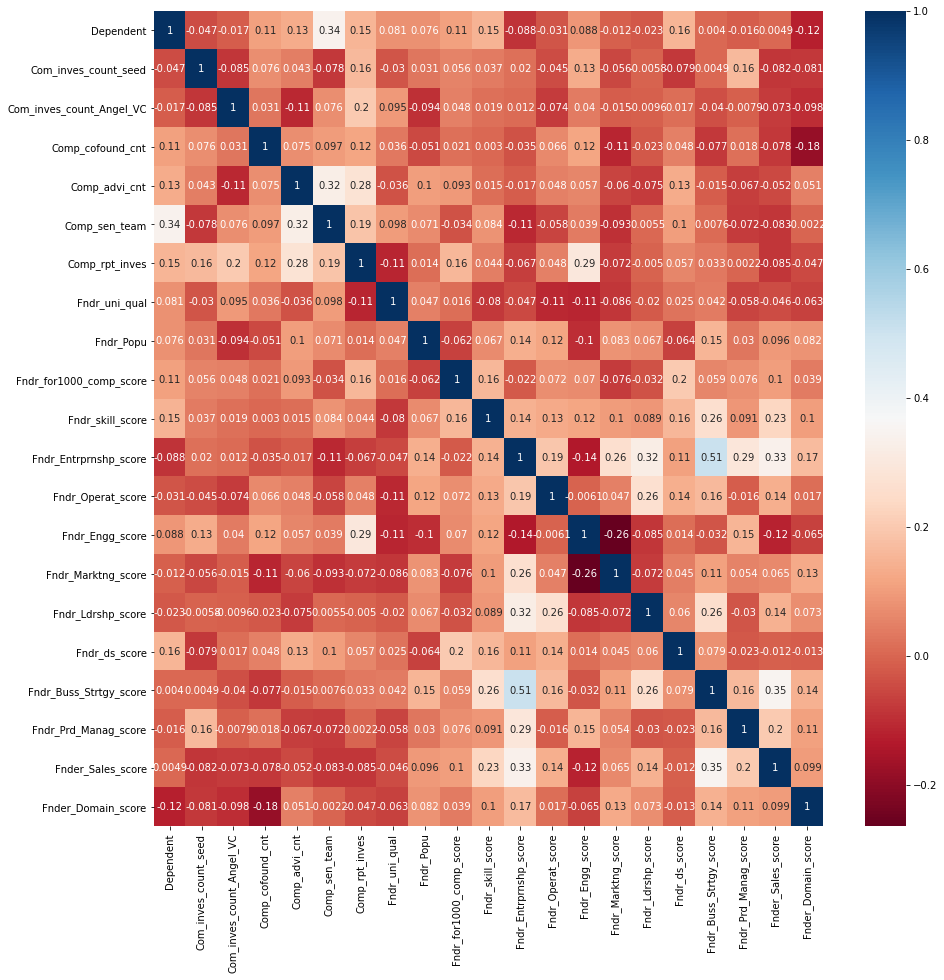

In [316]:
features = ['Dependent', 'Company_fund', 'Com_Indus_count',
       'Comp_mobile_app', 'Com_inves_count_seed', 'Com_inves_count_Angel_VC',
       'Comp_cofound_cnt', 'Comp_advi_cnt', 'Comp_sen_team', 'Comp_VC_funding',
       'Comp_rpt_inves', 'Fndr_top_comp_exp', 'Fndr_prev_comp_emp_cnt',
       'Fnder_startup_exp', 'Fndr_bg_5_exp', 'Fndr_exp', 'Fndr_glb_exp',
       'Fndr_Indus_exp', 'Fndr_uni_qual', 'Fndr_Popu',
       'Fndr_for1000_comp_score', 'Fndr_prof_smlarty', 'Fndr_pblcatn',
       'Fndr_skill_score', 'Fndr_Entrprnshp_score', 'Fndr_Operat_score',
       'Fndr_Engg_score', 'Fndr_Marktng_score', 'Fndr_Ldrshp_score',
       'Fndr_ds_score', 'Fndr_Buss_Strtgy_score', 'Fndr_Prd_Manag_score',
       'Fnder_Sales_score', 'Fnder_Domain_score', 'Cmp_incubtn_invst']

plt.figure(figsize = (15,15))
sns.heatmap(df[features].corr(), annot = True, cmap = plt.cm.RdBu)
plt.show()


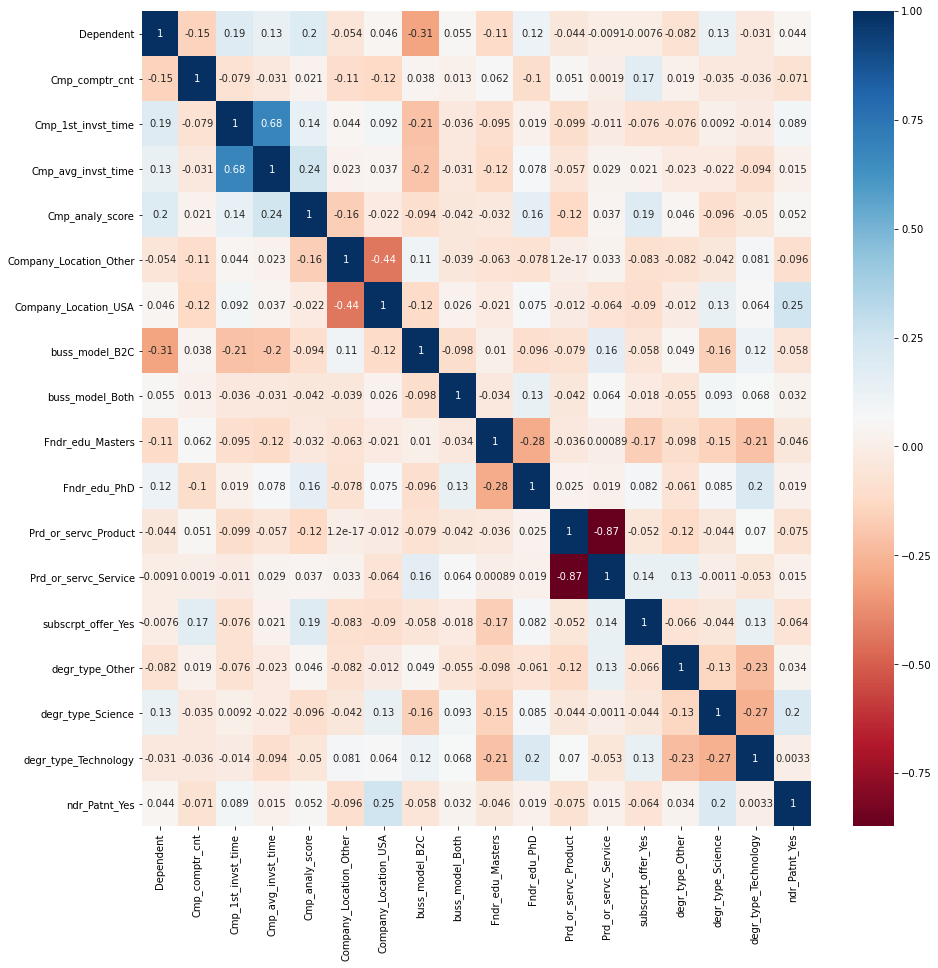

In [317]:
features = ['Dependent','Cmp_comptr_cnt', 'Cmp_1st_invst_time', 'Cmp_avg_invst_time',
       'Cmp_crwdsrcng', 'Cmp_crwdfndng', 'Cmp_big_data', 'Cmp_analy_score',
       'Cmp_dffclty_obtng_wrkfrc', 'Company_Location_Other',
       'Company_Location_USA', 'buss_model_B2C', 'buss_model_Both',
       'Fndr_edu_Masters', 'Fndr_edu_PhD', 'Prd_or_servc_Product',
       'Prd_or_servc_Service', 'subscrpt_offer_Yes', 'degr_type_Other',
       'degr_type_Science', 'degr_type_Technology', 'ndr_Patnt_Yes']

plt.figure(figsize = (15,15))
sns.heatmap(df[features].corr(), annot = True, cmap = plt.cm.RdBu)
plt.show()


# plotting distribution plot of all the features 

Plotting for column Dependent


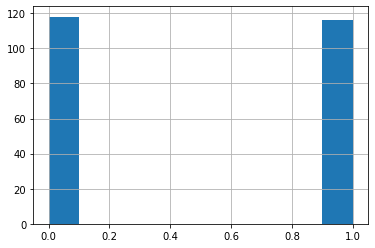

Plotting for column Company_fund


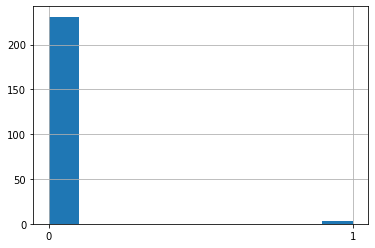

Plotting for column Com_Indus_count


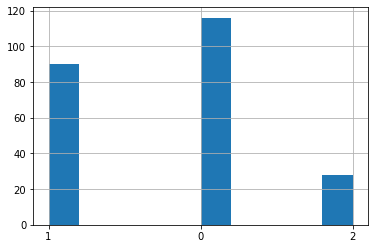

Plotting for column Comp_mobile_app


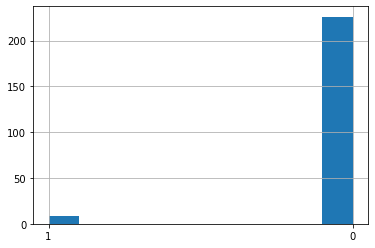

Plotting for column Com_inves_count_seed


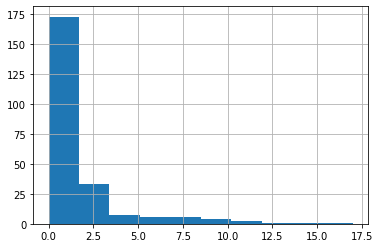

Plotting for column Com_inves_count_Angel_VC


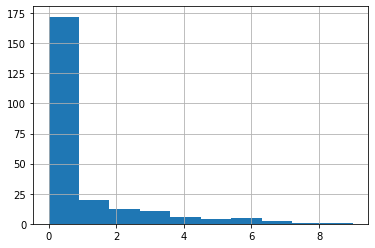

Plotting for column Comp_cofound_cnt


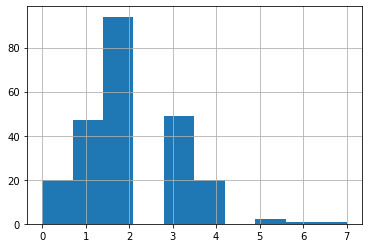

Plotting for column Comp_advi_cnt


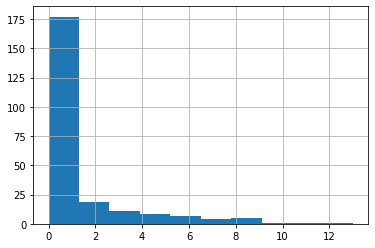

Plotting for column Comp_sen_team


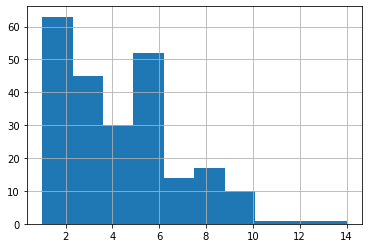

Plotting for column Comp_VC_funding


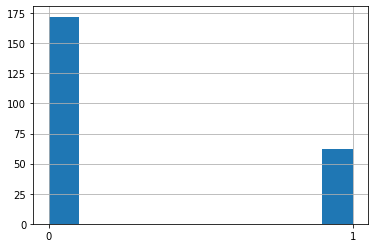

Plotting for column Comp_rpt_inves


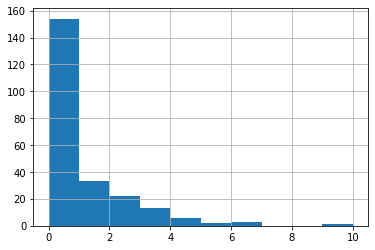

Plotting for column Fndr_top_comp_exp


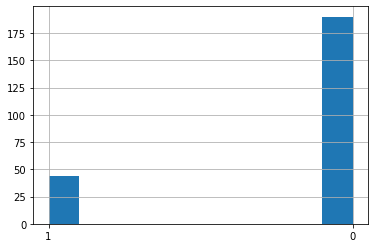

Plotting for column Fndr_prev_comp_emp_cnt


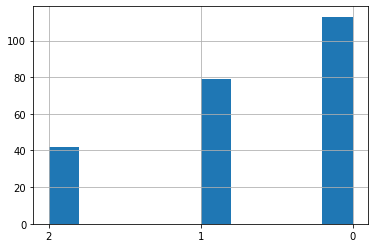

Plotting for column Fnder_startup_exp


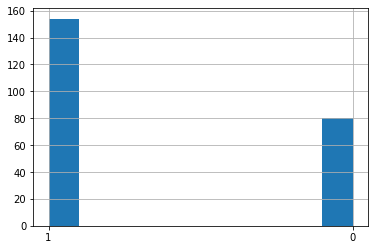

Plotting for column Fndr_bg_5_exp


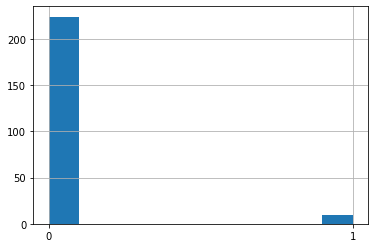

Plotting for column Fndr_exp


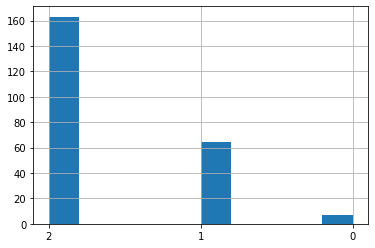

Plotting for column Fndr_glb_exp


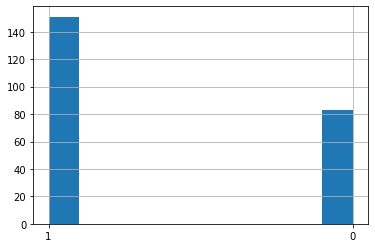

Plotting for column Fndr_Indus_exp


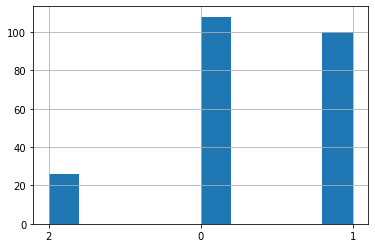

Plotting for column Fndr_uni_qual


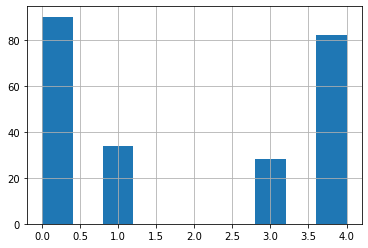

Plotting for column Fndr_Popu


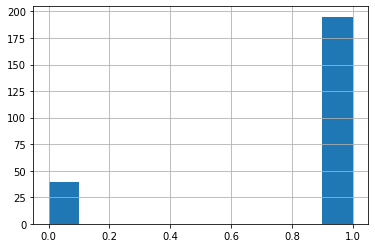

Plotting for column Fndr_for1000_comp_score


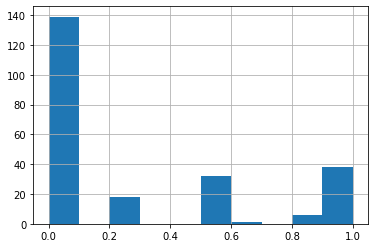

Plotting for column Fndr_prof_smlarty


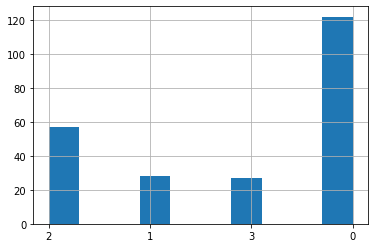

Plotting for column Fndr_pblcatn


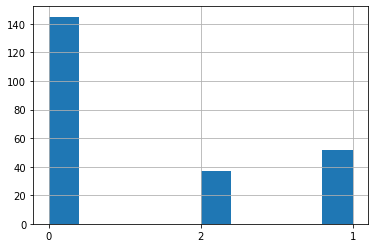

Plotting for column Fndr_skill_score


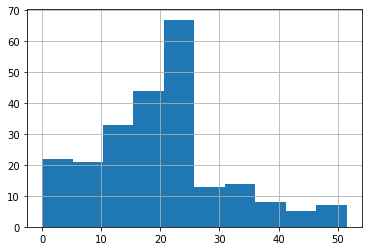

Plotting for column Fndr_Entrprnshp_score


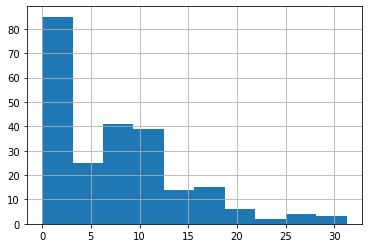

Plotting for column Fndr_Operat_score


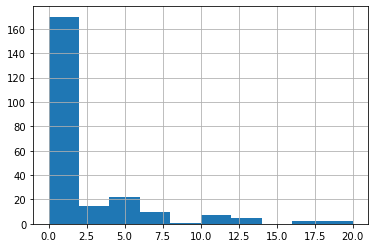

Plotting for column Fndr_Engg_score


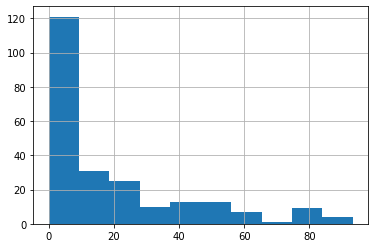

Plotting for column Fndr_Marktng_score


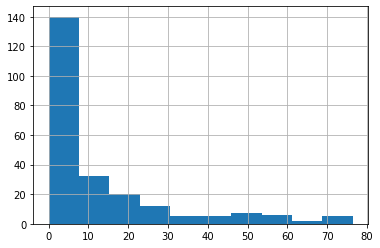

Plotting for column Fndr_Ldrshp_score


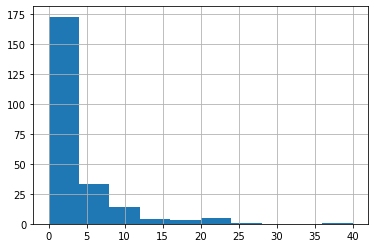

Plotting for column Fndr_ds_score


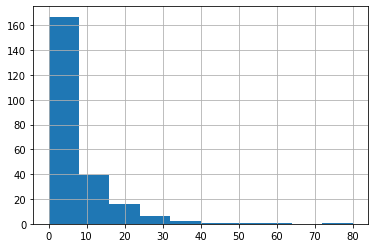

Plotting for column Fndr_Buss_Strtgy_score


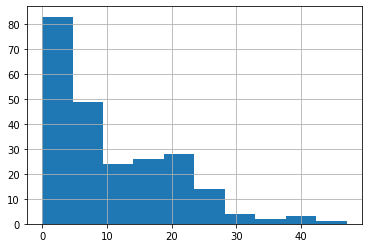

Plotting for column Fndr_Prd_Manag_score


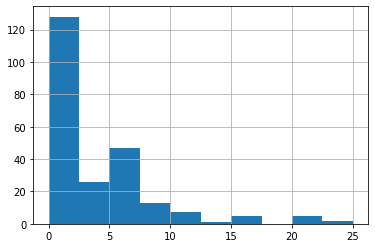

Plotting for column Fnder_Sales_score


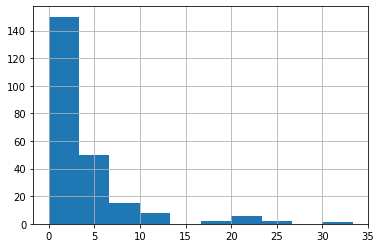

Plotting for column Fnder_Domain_score


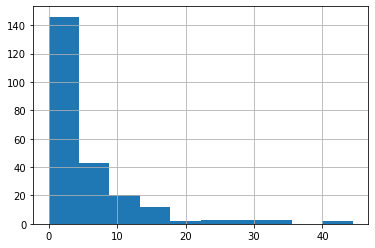

Plotting for column Cmp_incubtn_invst


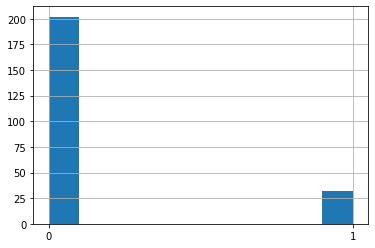

Plotting for column Cmp_comptr_cnt


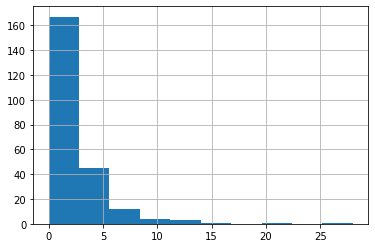

Plotting for column Cmp_1st_invst_time


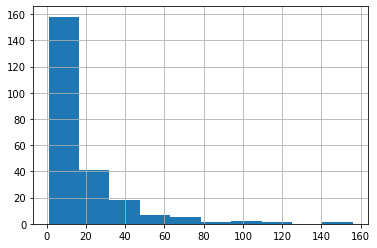

Plotting for column Cmp_avg_invst_time


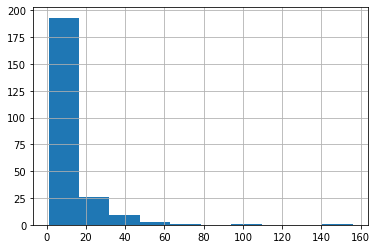

Plotting for column Cmp_crwdsrcng


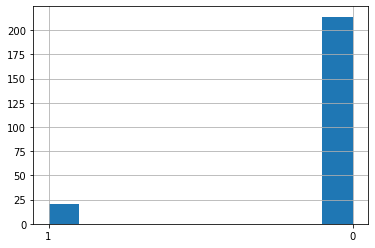

Plotting for column Cmp_crwdfndng


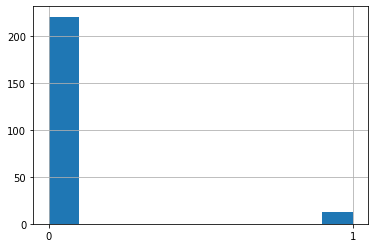

Plotting for column Cmp_big_data


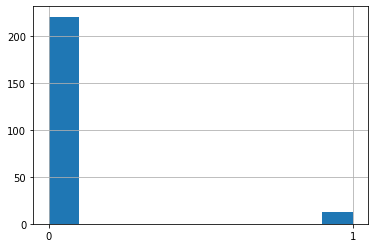

Plotting for column Cmp_analy_score


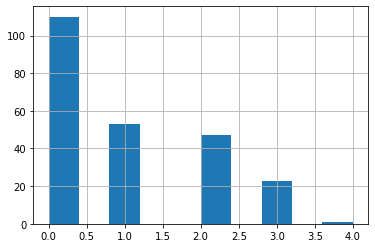

Plotting for column Cmp_dffclty_obtng_wrkfrc


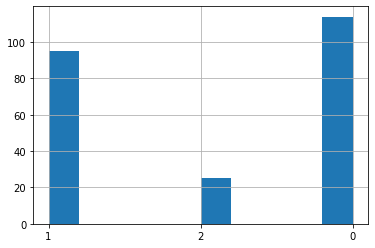

Plotting for column Company_Location_Other


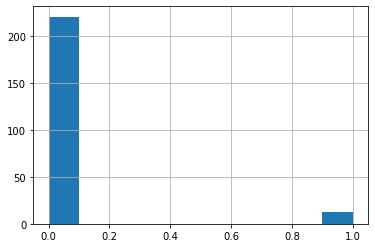

Plotting for column Company_Location_USA


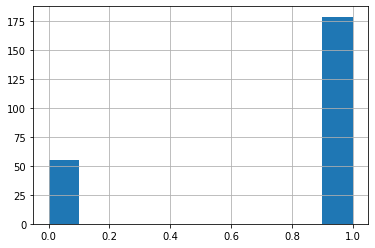

Plotting for column buss_model_B2C


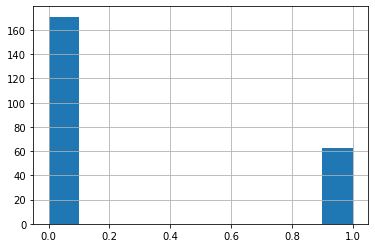

Plotting for column buss_model_Both


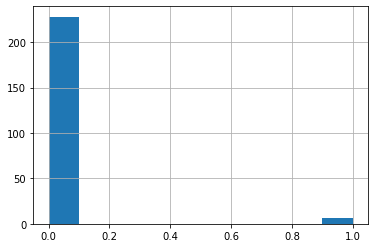

Plotting for column Fndr_edu_Masters


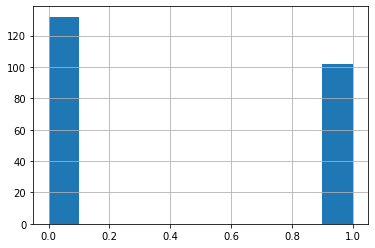

Plotting for column Fndr_edu_PhD


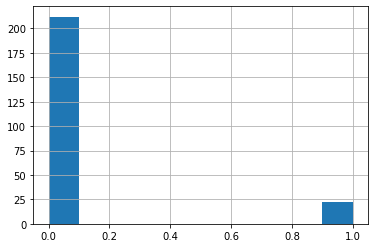

Plotting for column Prd_or_servc_Product


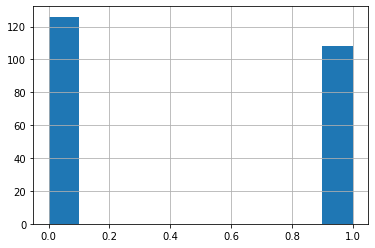

Plotting for column Prd_or_servc_Service


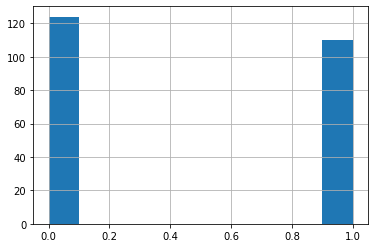

Plotting for column subscrpt_offer_Yes


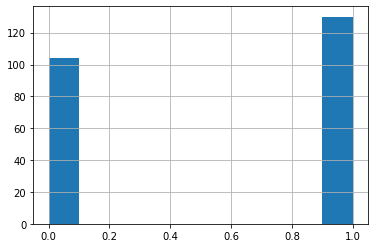

Plotting for column degr_type_Other


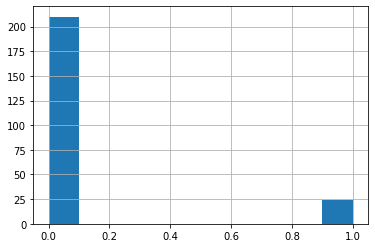

Plotting for column degr_type_Science


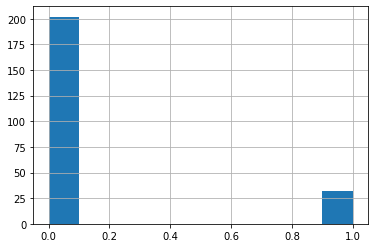

Plotting for column degr_type_Technology


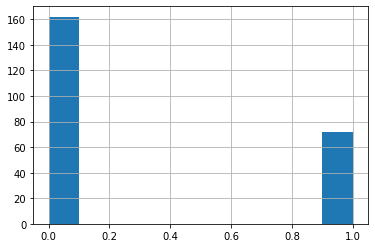

Plotting for column ndr_Patnt_Yes


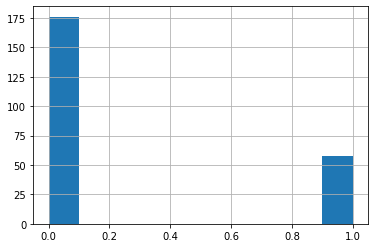

In [318]:
for col in df.columns:
    hist = df[col].hist(bins=10)
    print("Plotting for column {}".format(col))
    plt.show()

# feature selection using Univariate Selection and Feature Importance

In [319]:
Y=df.iloc[:,-1]
df.drop(['Dependent'],axis=1,inplace=True)
X=df.iloc[:,0:56]


C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [320]:
df

,Company_fund,Com_Indus_count,Comp_mobile_app,Com_inves_count_seed,Com_inves_count_Angel_VC,Comp_cofound_cnt,Comp_advi_cnt,Comp_sen_team,Comp_VC_funding,Comp_rpt_inves,Fndr_top_comp_exp,Fndr_prev_comp_emp_cnt,Fnder_startup_exp,Fndr_bg_5_exp,Fndr_exp,Fndr_glb_exp,Fndr_Indus_exp,Fndr_uni_qual,Fndr_Popu,Fndr_for1000_comp_score,Fndr_prof_smlarty,Fndr_pblcatn,Fndr_skill_score,Fndr_Entrprnshp_score,Fndr_Operat_score,Fndr_Engg_score,Fndr_Marktng_score,Fndr_Ldrshp_score,Fndr_ds_score,Fndr_Buss_Strtgy_score,Fndr_Prd_Manag_score,Fnder_Sales_score,Fnder_Domain_score,Cmp_incubtn_invst,Cmp_comptr_cnt,Cmp_1st_invst_time,Cmp_avg_invst_time,Cmp_crwdsrcng,Cmp_crwdfndng,Cmp_big_data,Cmp_analy_score,Cmp_dffclty_obtng_wrkfrc,Company_Location_Other,Company_Location_USA,buss_model_B2C,buss_model_Both,Fndr_edu_Masters,Fndr_edu_PhD,Prd_or_servc_Product,Prd_or_servc_Service,subscrpt_offer_Yes,degr_type_Other,degr_type_Science,degr_type_Technology,ndr_Patnt_Yes
0,0,1,1,5,0,2,0,4,0,0,1,2,1,0,2,1,2,4,1,0.0,2,0,34.0,15.882353,11.764706,15.000000,12.941176,0.000000,8.823529,21.764706,10.882353,2.941176,0.000000,0,0,10,9.000000,1,0,0,2,1,0,1,1,0,1,0,1,0,0,0,0,0,1
1,0,1,0,15,0,3,0,7,0,0,1,1,0,0,1,1,0,1,1,0.2,2,0,36.0,9.401709,0.000000,57.478632,0.000000,0.000000,3.846154,17.094017,9.401709,0.000000,2.777778,1,0,2,7.344444,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,1,0,1
2,0,1,0,7,0,1,1,8,0,0,0,0,0,0,2,1,1,0,1,0.0,1,2,23.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,13,9.822222,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1
3,0,1,0,2,0,4,0,4,0,2,0,1,0,0,2,1,1,0,1,0.0,1,0,25.0,6.250000,0.000000,3.125000,15.625000,9.375000,3.125000,6.250000,3.125000,3.125000,0.000000,1,0,12,9.322222,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1
4,0,1,0,0,0,3,4,4,0,0,0,2,1,0,2,1,1,4,1,0.0,3,2,4.5,0.000000,0.000000,10.112045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,20,6.400000,0,0,0,2,1,0,1,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,0,0,0,0,0,3,0,3,0,0,0,0,1,0,2,0,1,4,1,0.0,0,0,14.0,7.326007,0.000000,4.945055,19.780220,4.761905,12.637363,9.706960,5.128205,2.380952,0.000000,0,0,20,7.450000,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
230,0,0,0,0,2,3,1,5,0,6,0,0,1,0,2,1,1,0,1,0.0,3,0,25.0,0.000000,5.555556,0.000000,0.000000,11.111111,0.000000,16.666667,0.000000,5.555556,0.000000,0,3,12,12.000000,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0
231,0,0,0,0,0,1,6,2,0,0,0,1,1,0,2,1,0,3,1,0.5,0,1,23.0,11.111111,5.555556,0.000000,33.333333,0.000000,5.555556,22.222222,5.555556,0.000000,5.555556,0,3,10,8.706667,0,0,0,2,0,0,1,0,0,0,0,1,0,1,0,1,0,0
232,0,2,0,6,0,6,7,6,0,2,1,2,1,0,2,1,1,4,1,0.5,0,0,0.0,3.921569,0.000000,5.882353,5.882353,1.960784,3.921569,5.882353,1.960784,0.000000,1.960784,0,0,12,12.000000,0,0,0,0,2,0,1,0,0,1,0,1,0,0,0,0,0,0


In [321]:
df_test

,Dependent,Company_fund,Com_Indus_count,Comp_mobile_app,Com_inves_count_seed,Com_inves_count_Angel_VC,Comp_cofound_cnt,Comp_advi_cnt,Comp_sen_team,Comp_VC_funding,Comp_rpt_inves,Fndr_top_comp_exp,Fndr_prev_comp_emp_cnt,Fnder_startup_exp,Fndr_bg_5_exp,Fndr_exp,Fndr_glb_exp,Fndr_Indus_exp,Fndr_uni_qual,Fndr_Popu,Fndr_for1000_comp_score,Fndr_prof_smlarty,Fndr_pblcatn,Fndr_skill_score,Fndr_Entrprnshp_score,Fndr_Operat_score,Fndr_Engg_score,Fndr_Marktng_score,Fndr_Ldrshp_score,Fndr_ds_score,Fndr_Buss_Strtgy_score,Fndr_Prd_Manag_score,Fnder_Sales_score,Fnder_Domain_score,Cmp_incubtn_invst,Cmp_comptr_cnt,Cmp_1st_invst_time,Cmp_avg_invst_time,Cmp_crwdsrcng,Cmp_crwdfndng,Cmp_big_data,Cmp_analy_score,Cmp_dffclty_obtng_wrkfrc,Company_Location_Other,Company_Location_USA,buss_model_B2C,buss_model_Both,Fndr_edu_Masters,Fndr_edu_PhD,Prd_or_servc_Product,Prd_or_servc_Service,subscrpt_offer_Yes,degr_type_Other,degr_type_Science,degr_type_Technology,ndr_Patnt_Yes
0,NaN,0,0,0,2,0,1,2,2,1,4,0,0,0,0,2,1,0,4,1,0.0,0,0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,16,11.560000,0,0,0,0,0,0,1,1,0,1,0,0,1,1,0,0,0,0
1,NaN,0,1,0,6,0,2,0,4,1,0,0,2,1,0,1,1,0,1,1,0.0,2,0,15.5,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,2,1,8.700000,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,1
2,NaN,0,0,0,7,0,2,9,2,0,4,0,0,1,0,2,1,1,0,1,0.0,1,0,21.0,0.000000,0.0,66.666667,5.555556,0.000000,22.222222,0.000000,0.000000,0.000000,5.555556,0,0,11,7.311111,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0
3,NaN,0,1,0,0,0,3,4,3,0,0,1,1,1,0,2,1,2,4,1,0.0,2,0,25.5,8.333333,0.0,27.083333,19.791667,0.000000,23.958333,0.000000,0.000000,0.000000,20.833333,0,0,5,5.000000,0,0,0,1,2,0,1,0,0,0,1,1,0,0,0,1,0,0
4,NaN,0,1,0,0,1,0,1,7,0,1,0,0,1,0,2,1,2,4,1,0.0,1,2,12.0,27.272727,0.0,18.181818,0.000000,9.090909,0.000000,36.363636,9.090909,0.000000,0.000000,0,0,18,3.850000,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,NaN,0,0,0,0,2,3,0,2,0,2,0,1,0,0,2,0,0,1,1,0.0,0,0,23.0,7.142857,0.0,25.000000,0.000000,0.000000,0.000000,7.142857,7.142857,3.571429,0.000000,0,4,1,12.000000,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0
76,NaN,0,1,0,1,0,1,0,1,0,1,0,0,1,0,2,1,0,0,1,0.8,0,2,25.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,14,14.000000,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0
77,NaN,0,1,0,2,0,2,0,2,0,0,0,0,1,0,1,1,0,1,1,0.0,0,1,12.0,7.692308,0.0,23.076923,0.000000,0.000000,0.000000,11.538462,3.846154,0.000000,3.846154,0,0,24,24.000000,0,0,0,2,0,0,0,0,0,0,0,1,0,1,0,0,1,0
78,NaN,0,1,0,3,0,3,0,3,0,0,0,1,1,0,2,1,1,4,1,0.0,0,0,8.0,14.444444,0.0,0.000000,0.000000,0.000000,13.333333,6.666667,0.000000,14.444444,0.000000,0,4,1,1.000000,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0


# Feature Importance

[0.00359462 0.0062232  0.00368487 0.00663232 0.0080096  0.00567305
 0.00747807 0.01236177 0.00461992 0.00980233 0.00401588 0.00470564
 0.00498295 0.00692562 0.0050107  0.00966613 0.01837251 0.00738077
 0.00480361 0.00581387 0.01361037 0.01914971 0.00693939 0.00800336
 0.00477275 0.00636536 0.00687296 0.00513455 0.00621043 0.0061954
 0.00558037 0.00592562 0.00435116 0.0290294  0.00472208 0.00794868
 0.00663286 0.00717797 0.00172554 0.00100266 0.00841874 0.03122781
 0.00060541 0.01615053 0.00670135 0.00114813 0.00441234 0.00192268
 0.00323258 0.004592   0.00648139 0.00297668 0.01444496 0.00424481
 0.59633252]


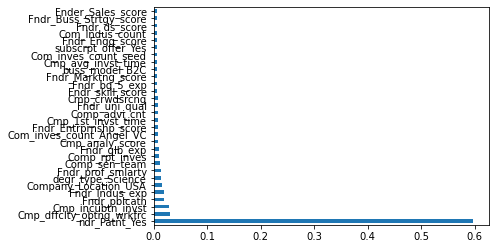

In [322]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

In [323]:
X

,Company_fund,Com_Indus_count,Comp_mobile_app,Com_inves_count_seed,Com_inves_count_Angel_VC,Comp_cofound_cnt,Comp_advi_cnt,Comp_sen_team,Comp_VC_funding,Comp_rpt_inves,Fndr_top_comp_exp,Fndr_prev_comp_emp_cnt,Fnder_startup_exp,Fndr_bg_5_exp,Fndr_exp,Fndr_glb_exp,Fndr_Indus_exp,Fndr_uni_qual,Fndr_Popu,Fndr_for1000_comp_score,Fndr_prof_smlarty,Fndr_pblcatn,Fndr_skill_score,Fndr_Entrprnshp_score,Fndr_Operat_score,Fndr_Engg_score,Fndr_Marktng_score,Fndr_Ldrshp_score,Fndr_ds_score,Fndr_Buss_Strtgy_score,Fndr_Prd_Manag_score,Fnder_Sales_score,Fnder_Domain_score,Cmp_incubtn_invst,Cmp_comptr_cnt,Cmp_1st_invst_time,Cmp_avg_invst_time,Cmp_crwdsrcng,Cmp_crwdfndng,Cmp_big_data,Cmp_analy_score,Cmp_dffclty_obtng_wrkfrc,Company_Location_Other,Company_Location_USA,buss_model_B2C,buss_model_Both,Fndr_edu_Masters,Fndr_edu_PhD,Prd_or_servc_Product,Prd_or_servc_Service,subscrpt_offer_Yes,degr_type_Other,degr_type_Science,degr_type_Technology,ndr_Patnt_Yes
0,0,1,1,5,0,2,0,4,0,0,1,2,1,0,2,1,2,4,1,0.0,2,0,34.0,15.882353,11.764706,15.000000,12.941176,0.000000,8.823529,21.764706,10.882353,2.941176,0.000000,0,0,10,9.000000,1,0,0,2,1,0,1,1,0,1,0,1,0,0,0,0,0,1
1,0,1,0,15,0,3,0,7,0,0,1,1,0,0,1,1,0,1,1,0.2,2,0,36.0,9.401709,0.000000,57.478632,0.000000,0.000000,3.846154,17.094017,9.401709,0.000000,2.777778,1,0,2,7.344444,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,1,0,1
2,0,1,0,7,0,1,1,8,0,0,0,0,0,0,2,1,1,0,1,0.0,1,2,23.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,13,9.822222,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1
3,0,1,0,2,0,4,0,4,0,2,0,1,0,0,2,1,1,0,1,0.0,1,0,25.0,6.250000,0.000000,3.125000,15.625000,9.375000,3.125000,6.250000,3.125000,3.125000,0.000000,1,0,12,9.322222,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1
4,0,1,0,0,0,3,4,4,0,0,0,2,1,0,2,1,1,4,1,0.0,3,2,4.5,0.000000,0.000000,10.112045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,20,6.400000,0,0,0,2,1,0,1,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,0,0,0,0,0,3,0,3,0,0,0,0,1,0,2,0,1,4,1,0.0,0,0,14.0,7.326007,0.000000,4.945055,19.780220,4.761905,12.637363,9.706960,5.128205,2.380952,0.000000,0,0,20,7.450000,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
230,0,0,0,0,2,3,1,5,0,6,0,0,1,0,2,1,1,0,1,0.0,3,0,25.0,0.000000,5.555556,0.000000,0.000000,11.111111,0.000000,16.666667,0.000000,5.555556,0.000000,0,3,12,12.000000,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0
231,0,0,0,0,0,1,6,2,0,0,0,1,1,0,2,1,0,3,1,0.5,0,1,23.0,11.111111,5.555556,0.000000,33.333333,0.000000,5.555556,22.222222,5.555556,0.000000,5.555556,0,3,10,8.706667,0,0,0,2,0,0,1,0,0,0,0,1,0,1,0,1,0,0
232,0,2,0,6,0,6,7,6,0,2,1,2,1,0,2,1,1,4,1,0.5,0,0,0.0,3.921569,0.000000,5.882353,5.882353,1.960784,3.921569,5.882353,1.960784,0.000000,1.960784,0,0,12,12.000000,0,0,0,0,2,0,1,0,0,1,0,1,0,0,0,0,0,0


# Univariate Selection

In [324]:
#apply SelectKBest class to extract top 47 best features
bestfeatures = SelectKBest(score_func=chi2, k=47)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
imp=featureScores.nlargest(47,'Score')
print(imp)

                       Specs       Score
54             ndr_Patnt_Yes  176.000000
35        Cmp_1st_invst_time   49.070470
30      Fndr_Prd_Manag_score   47.670314
9             Comp_rpt_inves   30.627884
24         Fndr_Operat_score   29.114717
6              Comp_advi_cnt   25.060321
32        Fnder_Domain_score   24.921666
41  Cmp_dffclty_obtng_wrkfrc   19.671398
7              Comp_sen_team   19.326834
3       Com_inves_count_seed   18.263916
33         Cmp_incubtn_invst   16.992604
31         Fnder_Sales_score   16.959938
21              Fndr_pblcatn   16.637959
23     Fndr_Entrprnshp_score   16.389931
28             Fndr_ds_score   16.275006
20         Fndr_prof_smlarty   15.920161
27         Fndr_Ldrshp_score   15.669302
4   Com_inves_count_Angel_VC   14.121054
26        Fndr_Marktng_score   13.662790
16            Fndr_Indus_exp   11.850190
52         degr_type_Science    8.374914
34            Cmp_comptr_cnt    7.449213
38             Cmp_crwdfndng    4.284091
39              

# here we will use the top 47 features and create a new dataframe and use it to train the model. same will be done to select the top 47 features in the test data frame.

# converting top features into list

In [325]:
imp1=imp['Specs']
imp1=imp1.tolist()
imp1

['ndr_Patnt_Yes',
 'Cmp_1st_invst_time',
 'Fndr_Prd_Manag_score',
 'Comp_rpt_inves',
 'Fndr_Operat_score',
 'Comp_advi_cnt',
 'Fnder_Domain_score',
 'Cmp_dffclty_obtng_wrkfrc',
 'Comp_sen_team',
 'Com_inves_count_seed',
 'Cmp_incubtn_invst',
 'Fnder_Sales_score',
 'Fndr_pblcatn',
 'Fndr_Entrprnshp_score',
 'Fndr_ds_score',
 'Fndr_prof_smlarty',
 'Fndr_Ldrshp_score',
 'Com_inves_count_Angel_VC',
 'Fndr_Marktng_score',
 'Fndr_Indus_exp',
 'degr_type_Science',
 'Cmp_comptr_cnt',
 'Cmp_crwdfndng',
 'Cmp_big_data',
 'Fndr_Buss_Strtgy_score',
 'Company_Location_USA',
 'Company_fund',
 'Fndr_uni_qual',
 'Cmp_crwdsrcng',
 'Com_Indus_count',
 'Company_Location_Other',
 'Fndr_bg_5_exp',
 'Cmp_avg_invst_time',
 'Cmp_analy_score',
 'Prd_or_servc_Product',
 'Comp_mobile_app',
 'Fnder_startup_exp',
 'buss_model_B2C',
 'Fndr_top_comp_exp',
 'subscrpt_offer_Yes',
 'Comp_cofound_cnt',
 'Fndr_prev_comp_emp_cnt',
 'Fndr_for1000_comp_score',
 'Fndr_edu_Masters',
 'degr_type_Other',
 'Fndr_glb_exp',
 'buss

# creating new data frame from the list of top features ( train )

In [326]:
df3=df.filter(['ndr_Patnt_Yes',
 'Cmp_1st_invst_time',
 'Fndr_Prd_Manag_score',
 'Comp_rpt_inves',
 'Fndr_Operat_score',
 'Comp_advi_cnt',
 'Fnder_Domain_score',
 'Cmp_dffclty_obtng_wrkfrc',
 'Comp_sen_team',
 'Com_inves_count_seed',
 'Cmp_incubtn_invst',
 'Fnder_Sales_score',
 'Fndr_pblcatn',
 'Fndr_Entrprnshp_score',
 'Fndr_ds_score',
 'Fndr_prof_smlarty',
 'Fndr_Ldrshp_score',
 'Com_inves_count_Angel_VC',
 'Fndr_Marktng_score',
 'Fndr_Indus_exp',
 'degr_type_Science',
 'Cmp_comptr_cnt',
 'Cmp_crwdfndng',
 'Cmp_big_data',
 'Fndr_Buss_Strtgy_score',
 'Company_Location_USA',
 'Company_fund',
 'Fndr_uni_qual',
 'Cmp_crwdsrcng',
 'Com_Indus_count',
 'Company_Location_Other',
 'Fndr_bg_5_exp',
 'Cmp_avg_invst_time',
 'Cmp_analy_score',
 'Prd_or_servc_Product',
 'Comp_mobile_app',
 'Fnder_startup_exp',
 'buss_model_B2C',
 'Fndr_top_comp_exp',
 'subscrpt_offer_Yes',
 'Comp_cofound_cnt',
 'Fndr_prev_comp_emp_cnt',
 'Fndr_for1000_comp_score',
 'Fndr_edu_Masters',
 'degr_type_Other',
 'Fndr_glb_exp',
 'buss_model_Both'],axis=1).copy()

# creating new data frame from the list of top feature( test )

In [327]:
df_test3=df_test.filter(['ndr_Patnt_Yes',
 'Cmp_1st_invst_time',
 'Fndr_Prd_Manag_score',
 'Comp_rpt_inves',
 'Fndr_Operat_score',
 'Comp_advi_cnt',
 'Fnder_Domain_score',
 'Cmp_dffclty_obtng_wrkfrc',
 'Comp_sen_team',
 'Com_inves_count_seed',
 'Cmp_incubtn_invst',
 'Fnder_Sales_score',
 'Fndr_pblcatn',
 'Fndr_Entrprnshp_score',
 'Fndr_ds_score',
 'Fndr_prof_smlarty',
 'Fndr_Ldrshp_score',
 'Com_inves_count_Angel_VC',
 'Fndr_Marktng_score',
 'Fndr_Indus_exp',
 'degr_type_Science',
 'Cmp_comptr_cnt',
 'Cmp_crwdfndng',
 'Cmp_big_data',
 'Fndr_Buss_Strtgy_score',
 'Company_Location_USA',
 'Company_fund',
 'Fndr_uni_qual',
 'Cmp_crwdsrcng',
 'Com_Indus_count',
 'Company_Location_Other',
 'Fndr_bg_5_exp',
 'Cmp_avg_invst_time',
 'Cmp_analy_score',
 'Prd_or_servc_Product',
 'Comp_mobile_app',
 'Fnder_startup_exp',
 'buss_model_B2C',
 'Fndr_top_comp_exp',
 'subscrpt_offer_Yes',
 'Comp_cofound_cnt',
 'Fndr_prev_comp_emp_cnt',
 'Fndr_for1000_comp_score',
 'Fndr_edu_Masters',
 'degr_type_Other',
 'Fndr_glb_exp',
 'buss_model_Both'],axis=1).copy()

# train test split

In [328]:
X_train, X_test, Y_train, Y_test = train_test_split(df3, Y, 
                                                    test_size=0.2, 
                                                    random_state=0)

# logistic regression model training and predicting X_test

In [329]:
lr=LogisticRegression(max_iter=10000)
lr.fit(X_train,Y_train)
prid=lr.predict(X_test)


In [330]:
prid

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1], dtype=uint8)

# calculating AUC for X_test data 

In [331]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(Y_test, prid)
auc_score1

0.9545454545454546

# predicting values for test cases given by the company 

In [332]:
df_test3

,ndr_Patnt_Yes,Cmp_1st_invst_time,Fndr_Prd_Manag_score,Comp_rpt_inves,Fndr_Operat_score,Comp_advi_cnt,Fnder_Domain_score,Cmp_dffclty_obtng_wrkfrc,Comp_sen_team,Com_inves_count_seed,Cmp_incubtn_invst,Fnder_Sales_score,Fndr_pblcatn,Fndr_Entrprnshp_score,Fndr_ds_score,Fndr_prof_smlarty,Fndr_Ldrshp_score,Com_inves_count_Angel_VC,Fndr_Marktng_score,Fndr_Indus_exp,degr_type_Science,Cmp_comptr_cnt,Cmp_crwdfndng,Cmp_big_data,Fndr_Buss_Strtgy_score,Company_Location_USA,Company_fund,Fndr_uni_qual,Cmp_crwdsrcng,Com_Indus_count,Company_Location_Other,Fndr_bg_5_exp,Cmp_avg_invst_time,Cmp_analy_score,Prd_or_servc_Product,Comp_mobile_app,Fnder_startup_exp,buss_model_B2C,Fndr_top_comp_exp,subscrpt_offer_Yes,Comp_cofound_cnt,Fndr_prev_comp_emp_cnt,Fndr_for1000_comp_score,Fndr_edu_Masters,degr_type_Other,Fndr_glb_exp,buss_model_Both
0,0,16,0.000000,4,0.0,2,0.000000,0,2,2,0,0.000000,0,0.000000,0.000000,0,0.000000,0,0.000000,0,0,0,0,0,0.000000,1,0,4,0,0,0,0,11.560000,0,0,0,0,1,0,1,1,0,0.0,1,0,1,0
1,1,1,0.000000,0,0.0,0,0.000000,1,4,6,1,0.000000,0,0.000000,0.000000,2,0.000000,0,0.000000,0,0,2,0,0,0.000000,1,0,1,1,1,0,0,8.700000,0,1,0,1,0,0,1,2,2,0.0,0,0,1,0
2,0,11,0.000000,4,0.0,9,5.555556,1,2,7,0,0.000000,0,0.000000,22.222222,1,0.000000,0,5.555556,1,0,0,0,0,0.000000,1,0,0,0,0,0,0,7.311111,1,0,0,1,0,0,1,2,0,0.0,0,0,1,0
3,0,5,0.000000,0,0.0,4,20.833333,2,3,0,0,0.000000,0,8.333333,23.958333,2,0.000000,0,19.791667,2,1,0,0,0,0.000000,1,0,4,0,1,0,0,5.000000,1,1,0,1,0,1,0,3,1,0.0,0,0,1,0
4,1,18,9.090909,1,0.0,1,0.000000,1,7,0,0,0.000000,2,27.272727,0.000000,1,9.090909,1,0.000000,2,1,0,0,0,36.363636,1,0,4,0,1,0,0,3.850000,0,1,0,1,0,0,0,0,0,0.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0,1,7.142857,2,0.0,0,0.000000,1,2,0,0,3.571429,0,7.142857,0.000000,0,0.000000,2,0.000000,0,1,4,0,0,7.142857,1,0,1,0,0,0,0,12.000000,0,1,0,0,1,0,1,3,1,0.0,0,0,0,0
76,0,14,0.000000,1,0.0,0,0.000000,0,1,1,0,0.000000,2,0.000000,0.000000,0,0.000000,0,0.000000,0,0,1,0,0,0.000000,1,0,0,0,1,0,0,14.000000,1,0,0,1,0,0,1,1,0,0.8,0,0,1,0
77,0,24,3.846154,0,0.0,0,3.846154,0,2,2,0,0.000000,1,7.692308,0.000000,0,0.000000,0,0.000000,0,0,0,0,0,11.538462,0,0,1,0,1,0,0,24.000000,2,1,0,1,0,0,1,2,0,0.0,0,0,1,0
78,0,1,0.000000,0,0.0,0,0.000000,0,3,3,0,14.444444,0,14.444444,13.333333,0,0.000000,0,0.000000,1,0,4,0,0,6.666667,0,0,4,0,1,1,0,1.000000,0,1,0,1,0,0,0,3,1,0.0,0,0,1,0


In [333]:
prid=lr.predict(df_test3)
prid

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

# creating datframe with predicted value and saving it in xlxs form

# converting predicted value to dataframe

In [334]:
dd=pd.DataFrame(prid, columns=['Dependent'])
dd

,Dependent
0,0
1,1
2,0
3,0
4,1
...,...
75,0
76,0
77,0
78,0


# comapny id converted to dataframe

In [335]:
dc=df_test1[['CAX_ID']]
dc

,CAX_ID
0,Company1
1,Company4
2,Company7
3,Company10
4,Company12
...,...
75,Company312
76,Company288
77,Company293
78,Company300


# concatinating data frames to create final dataframe

In [336]:
dd=pd.concat([dc,dd],axis=1)

In [337]:
dd.head(30)

,CAX_ID,Dependent
0,Company1,0
1,Company4,1
2,Company7,0
3,Company10,0
4,Company12,1
5,Company21,1
6,Company29,0
7,Company30,1
8,Company33,0
9,Company36,0


# saving the dataframe into csv form

In [338]:

dd.to_csv('submission.csv', index=False)